In [15]:
import read, explore, preprocess, model

import tensorflow as tf
import os
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import imageio
from skimage.filters import gaussian
import geopandas as gpd
from collections import Counter

import importlib
importlib.reload(read)
importlib.reload(preprocess)
#make sure we are using the GPU
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


In [13]:
meta_df = read.get_shapevalue_df()
meta_df[meta_df.POLITICAL_ == "CH"]

,glac_id,glac_name,x,y,index_righ,POLITICAL_,NAME,WGMS_ID,PRIM_CLASS,GLIMS_ID,geometry
221,G008319E46431N,GRIESGLETSCHER,8.319,46.431,113,CH,GRIES,359,5.0,None,"POLYGON Z ((8.31075 46.42634 0.00000, 8.31042 ..."
222,G007807E46481N,KANDERFIRN,7.807,46.481,99,CH,ALPETLI (KANDER),439,5.0,None,"POLYGON Z ((7.79062 46.46445 0.00000, 7.79062 ..."
223,G007581E46002N,FERP?CLE GLACIER DE,7.581,46.002,107,CH,FERPECLE,379,5.0,None,"POLYGON Z ((7.59569 46.01926 0.00000, 7.59581 ..."
224,G008426E46612N,TIEFENGLETSCHER,8.426,46.612,137,CH,TIEFEN,433,5.0,None,"POLYGON Z ((8.43101 46.61765 0.00000, 8.43069 ..."
225,G007930E46472N,Langgletscher,7.930,46.472,117,CH,LANG,386,5.0,None,"POLYGON Z ((7.93262 46.49828 0.00000, 7.93320 ..."
226,G008006E46177N,ROSSBODEGLETSCHER,8.006,46.177,132,CH,ROSSBODEN,462,5.0,None,"POLYGON Z ((8.02135 46.18955 0.00000, 8.02120 ..."
227,G007261E45966N,BOVEIRE GLACIER DE,7.261,45.966,102,CH,BOVEYRE,459,5.0,None,"POLYGON Z ((7.27209 45.96674 0.00000, 7.27208 ..."
229,G009038E46502N,LNTAGLETSCHER,9.038,46.502,118,CH,LENTA,414,5.0,None,"POLYGON Z ((9.04053 46.52086 0.00000, 9.04058 ..."
230,G007603E46067N,MOIRY GLACIER DE,7.603,46.067,120,CH,MOIRY,380,5.0,None,"POLYGON Z ((7.60492 46.08368 0.00000, 7.60492 ..."
231,G007422E46008N,CHEILON GLACIER DE,7.422,46.008,105,CH,CHEILLON,375,5.0,None,"POLYGON Z ((7.41784 46.00037 0.00000, 7.41784 ..."


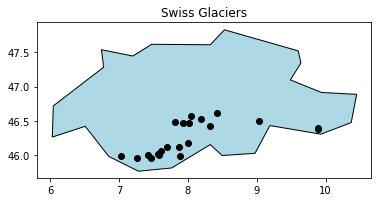

In [14]:
glacier_locals = meta_df[['glac_id','glac_name','x','y','POLITICAL_']]
glacier_locals = pd.DataFrame(glacier_locals)
glacier_locals = glacier_locals[glacier_locals.POLITICAL_ == 'CH']
swiss_ids = list(glacier_locals.glac_id)
swiss_ids = swiss_ids[:-4]
df_geo = gpd.GeoDataFrame(glacier_locals, geometry = gpd.points_from_xy(glacier_locals.x, glacier_locals.y))
world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
axis = world_data[world_data.name == "Switzerland"].plot(color = 'lightblue', edgecolor = 'black')
df_geo.plot(ax = axis, color = 'black')
plt.title("Swiss Glaciers")
plt.show()